 # Logistic Regression and Classification and Eroor Matrices

In [ ]:
#from __future__ import print_function
#import os
#data_path = ['data']
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
#from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
from __future__ import print_function
import os
data_path = ['data']
import pandas as pd
import numpy as np

filepath = os.sep.join(data_path + ['UNSW_2018_IoT_Botnet_Final_10_best_Training.csv'])
data = pd.read_csv(filepath, sep=',')
data.head().T

,0,1,2,3,4
pkSeqID,3142762,2432264,1976315,1240757,3257991
proto,udp,tcp,tcp,udp,udp
saddr,192.168.100.150,192.168.100.150,192.168.100.147,192.168.100.150,192.168.100.147
sport,6551,5532,27165,48719,22461
daddr,192.168.100.3,192.168.100.3,192.168.100.3,192.168.100.3,192.168.100.3
dport,80,80,80,80,80
seq,251984,256724,62921,99168,105063
stddev,1.900363,0.078003,0.268666,1.823185,0.822418
N_IN_Conn_P_SrcIP,100,38,100,63,100
min,0.0,3.85693,2.9741,0.0,2.979995


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2934817 entries, 0 to 2934816
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   pkSeqID            int64  
 1   proto              object 
 2   saddr              object 
 3   sport              object 
 4   daddr              object 
 5   dport              object 
 6   seq                int64  
 7   stddev             float64
 8   N_IN_Conn_P_SrcIP  int64  
 9   min                float64
 10  state_number       int64  
 11  mean               float64
 12  N_IN_Conn_P_DstIP  int64  
 13  drate              float64
 14  srate              float64
 15  max                float64
 16  attack             int64  
 17  category           object 
 18  subcategory        object 
dtypes: float64(6), int64(6), object(7)
memory usage: 425.4+ MB


In [10]:
data.describe()

,pkSeqID,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack
count,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06
mean,1.834209e+06,1.212973e+05,8.869639e-01,8.254997e+01,1.017208e+00,3.134219e+00,2.230471e+00,9.245766e+01,4.303064e-01,3.128290e+00,3.019269e+00,9.998739e-01
std,1.059058e+06,7.578700e+04,8.036391e-01,2.439019e+01,1.483551e+00,1.187107e+00,1.517766e+00,1.816651e+01,5.623304e+01,7.845494e+02,1.860915e+00,1.122750e-02
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.171090e+05,5.484700e+04,2.999700e-02,6.900000e+01,0.000000e+00,3.000000e+00,1.819340e-01,1.000000e+02,0.000000e+00,1.558450e-01,2.804170e-01,1.000000e+00
50%,1.834316e+06,1.177370e+05,7.925750e-01,1.000000e+02,0.000000e+00,4.000000e+00,2.689973e+00,1.000000e+02,0.000000e+00,2.837800e-01,4.008429e+00,1.000000e+00
75%,2.751250e+06,1.848700e+05,1.745220e+00,1.000000e+02,2.147949e+00,4.000000e+00,3.565061e+00,1.000000e+02,0.000000e+00,4.880000e-01,4.292426e+00,1.000000e+00
max,3.668522e+06,2.622110e+05,2.496763e+00,1.000000e+02,4.980471e+00,1.100000e+01,4.981882e+00,1.000000e+02,5.882353e+04,1.000000e+06,4.999999e+00,1.000000e+00


In [12]:
data["proto"].value_counts()


udp          1596819
tcp          1330598
icmp            7228
arp              166
ipv6-icmp          6
Name: proto, dtype: int64

In [13]:
data["saddr"].value_counts()

192.168.100.147              761360
192.168.100.148              738642
192.168.100.150              712260
192.168.100.149              711466
192.168.100.3                  6609
192.168.100.5                  4107
192.168.100.6                   272
192.168.100.7                    34
192.168.100.4                    17
192.168.100.1                    14
192.168.100.27                    9
192.168.100.46                    8
fe80::250:56ff:febe:254           5
192.168.100.55                    3
fe80::2c6a:ff9b:7e14:166a         2
fe80::250:56ff:febe:c038          2
fe80::c0c0:aa20:45b9:bdd9         2
fe80::250:56ff:febe:89ee          2
fe80::250:56ff:febe:26db          2
fe80::250:56ff:febe:e9d9          1
Name: saddr, dtype: int64

In [14]:
data["sport"].value_counts()

0x0303    7156
80        3220
1822       878
60541      869
1216       868
          ... 
39364       31
18992       30
39305       30
0x000d      10
0x0011       8
Name: sport, Length: 65541, dtype: int64



Importing the data and do the following:

* Data types--there are many columns, so it might be wise to use value counts
* Determining if the floating point values need to be scaled
* Determining the breakdown of each activity
* Encode the activity label as an integer

In [4]:
import pandas as pd
import numpy as np
#The filepath is dependent on the data_path set in the previous cell 
filepath = os.sep.join(data_path + ['Human_Activity_Recognition_Using_Smartphones_Data.csv'])
data = pd.read_csv(filepath, sep=',')

The data columns are all floats except for the activity label.

In [5]:
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [6]:
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

The data are all scaled from -1 (minimum) to 1.0 (maximum).

In [7]:
data.iloc[:,:-1].min().value_counts()

-1.0    561
dtype: int64

In [8]:
data.iloc[:,:-1].max().value_counts()

1.0    561
dtype: int64

Examining the breakdown of activities--they are relatively balanced.

In [9]:
data.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

Scikit learn classifiers won't accept a sparse matrix for the prediction column. Thus, either `LabelEncoder` needs to be used to convert the activity labels to integers, or if `DictVectorizer` is used, the resulting matrix must be converted to a non-sparse array.  
Using `LabelEncoder` to fit_transform the "Activity" column, and look at 5 random values.

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity']=le.fit_transform(data.Activity)
data['Activity'].sample(5)

9904    5
9912    5
5072    2
5559    0
6985    2
Name: Activity, dtype: int32



* Calculating the correlations between the dependent variables.
* Creating a histogram of the correlation values
* Identify those that are most correlated (either positively or negatively).

In [11]:

#Calculate the correlation values
feature_cols=data.columns[:-1]
corr_values = data[feature_cols].corr()
#Simplify by emptying all the data below the dia onal
tril_index= np.tril_indices_from(corr_values)
#Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
#Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'featurel',
                                'level_1':'feature2',
                                0:'correlation'}))

#Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

A histogram of the absolute value correlations.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

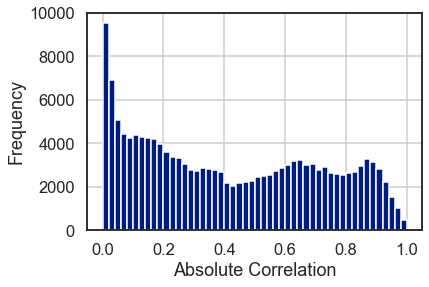

In [13]:
sns.set_context('talk')
sns.set_style('white')
sns.set_palette('dark')

ax = corr_values.abs_correlation.hist(bins=50)
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [14]:
# The most highly correlated values
corr_values.sort_values('correlation',ascending=False).query('abs_correlation>0.8')

,featurel,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764




* Spliting the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
* Regardless of methods used to split the data, compare the ratio of classes in both the train and test splits.


In [15]:
from sklearn.model_selection import StratifiedShuffleSplit


#Get the split indexes
strat_shuf_split=StratifiedShuffleSplit(n_splits=1,
                                         test_size=0.3,
                                         random_state=42)
train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))
#Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train=data.loc[train_idx, 'Activity']
X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'Activity']

In [16]:
y_train.value_counts(normalize=True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [17]:
y_test.value_counts(normalize=True)

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64



* Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficient output. Store the model.
* Using cross validation to determine the hyperparameters, fit models using L1, and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.

In [18]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr=LogisticRegression().fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized Logistic regression
lr_l1=LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)


In [24]:
#Try with different solvers like ‘newton-cg’, ‘lbfgs’, ‘sag’, ‘saga’ and give your observations

In [25]:
# L2 regularized logistic regression
#L2 Tegularized Logistic regression
lr_l2=LogisticRegressionCV(Cs=10, cv=4, penalty='l2').fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_



Comparing the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately. 

In [27]:
# Combine all the coefficients into a dataframe
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]


for lab,mod in zip(coeff_labels, coeff_models):
    coeffs=mod.coef_
    """
    coeff label pd.MultiIndex(levels-[[lab], [0,1,2,3,4,5]],
    labels-[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    """
    coeff_label = pd.MultiIndex.from_product([[lab], [0,1,2,3,4,5]], names=['coeff_labels', 'coefficient'])
    coefficients.append(pd. DataFrame(coeffs.T, columns=coeff_label))
    
coefficients =pd.concat(coefficients, axis=1)
coefficients.sample(10)

coeff_labels        lr                                                     l1  \
coefficient          0         1         2         3         4         5    0   
147          -0.011663 -0.854493  0.835294 -0.059371  0.212028 -0.121794  0.0   
479          -0.007334  0.034228  0.094769 -0.107267  0.070197 -0.084593  0.0   
264           0.046865  0.348251 -0.476108  0.130751 -0.243860  0.194100  0.0   
438          -0.090105 -0.160008 -0.028844  0.100036  0.068165  0.110755  0.0   
229          -0.146399 -0.112305 -0.073635  0.186524 -0.241998  0.387814  0.0   
5            -0.028447 -0.053498 -0.082334  0.107093 -0.143308  0.200493  0.0   
432          -0.067811 -0.172203  0.008684 -0.067892  0.317456 -0.018232  0.0   
424          -0.075429 -0.086036 -0.040374  0.159287  0.096893 -0.054341  0.0   
429          -0.079190 -0.222618  0.033553  0.067969  0.145176  0.055110  0.0   
162           0.008235  0.060910 -0.026976  0.194188  0.036809 -0.273166  0.0   

coeff_labels                                                         l2  \
coefficient          1        2         3         4         5         0   
147           0.000000  0.00000  0.000000  0.100318 -4.114893 -0.030330   
479           0.000000  0.20547  0.000525  0.180211  0.409681 -0.113818   
264           0.465824  0.00000  0.840006 -0.423323  0.460399  0.076496   
438           0.000000  0.00000  0.000000 -0.235142  0.208130 -0.079240   
229           0.000000  0.00000  0.054092 -0.728701  0.158016 -0.157073   
5            -0.506662  0.00000  0.000000 -0.644830 -0.011318  0.072467   
432           0.000000  0.00000  0.000000  0.761646 -0.470489 -0.101479   
424           0.000000  0.00000  0.000000 -0.022983 -0.452638 -0.067198   
429           0.000000  0.00000  0.000000  0.000000  0.788641 -0.104267   
162           0.000000  0.00000  0.810645  0.000000 -1.257104  0.011713   

coeff_labels                                                    
coefficient          1         2         3         4         5  
147          -0.587071  0.597330 -0.054921  0.441826 -0.366834  
479          -0.038774  0.241884 -0.054579  0.096264 -0.130979  
264          -0.284989  0.125931  0.202297 -0.509605  0.389870  
438          -0.520984  0.278554  0.061635  0.024432  0.235603  
229           0.105813 -0.291737  0.300016 -0.599955  0.642936  
5            -0.144027 -0.076161  0.077743 -0.219421  0.289399  
432          -0.495174  0.163045  0.026566  0.550106 -0.143065  
424          -0.479706  0.346047  0.179173  0.056290 -0.034606  
429          -0.228513 -0.093247  0.117896  0.223431  0.084700  
162           0.721993 -0.712007  0.368817  0.172245 -0.562761

Preparing six separate plots for each of the multi-class coefficients.

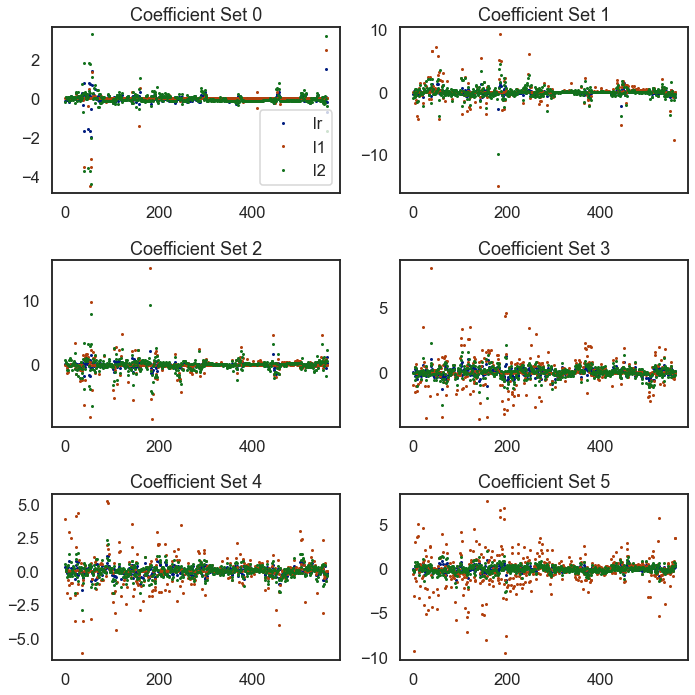

In [28]:
#Preparing six separate plots for each of the multi-class coefficients
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)


for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    data=coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='' , ms=2.0, ax=ax, legend=False)
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))
    
plt.tight_layout()



* Predicting and store the class for each model.
* Also store the probability for the predicted class for each model. 

In [29]:
# Predicting the class and the probability for each model

y_pred = list()
y_prob = list()

coeff_labels = ['l ', 'l1', 'l2']
coeff_models= [lr, lr_l1, lr_l2]
for lab, mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd. Series(mod.predict_proba(X_test).max(axis=1), name=lab))
y_pred= pd.concat(y_pred, axis=1)
y_prob= pd.concat(y_prob, axis=1)
y_pred.head()



,l,l1,l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0


In [30]:
y_prob.head()

,l,l1,l2
0,0.999995,0.999058,1.000000
1,0.999237,0.999685,0.999995
2,0.997380,0.996038,0.999950
3,0.988755,0.999179,0.999947
4,0.995029,0.999918,0.999957




For each model, calculating the following error metrics: 

* accuracy
* precision
* recall
* fscore
* confusion matrix

Decide how to combine the multi-class metrics into a single value for each model.

In [31]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics=list()
cm= dict()
for lab in coeff_labels:
# Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore,_=score(y_test, y_pred[lab], average='weighted')
# The usual way to calculate accuracy lab])
    accuracy = accuracy_score(y_test, y_pred[lab])
# ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
                        label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]),average='weighted' )
# Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
        
    metrics.append(pd.Series({'precision' :precision, 'recall':recall,
                                'fscore' :fscore, 'accuracy':accuracy,
                                'auc':auc},
                               name=lab))
        
metrics = pd.concat(metrics, axis=1)

In [32]:
#Run the metrics
metrics

,l,l1,l2
precision,0.980246,0.983835,0.986087
recall,0.980259,0.983819,0.986084
fscore,0.980248,0.983815,0.986083
accuracy,0.980259,0.983819,0.986084
auc,0.988042,0.990144,0.991539




Display or plot the confusion matrix for each model.

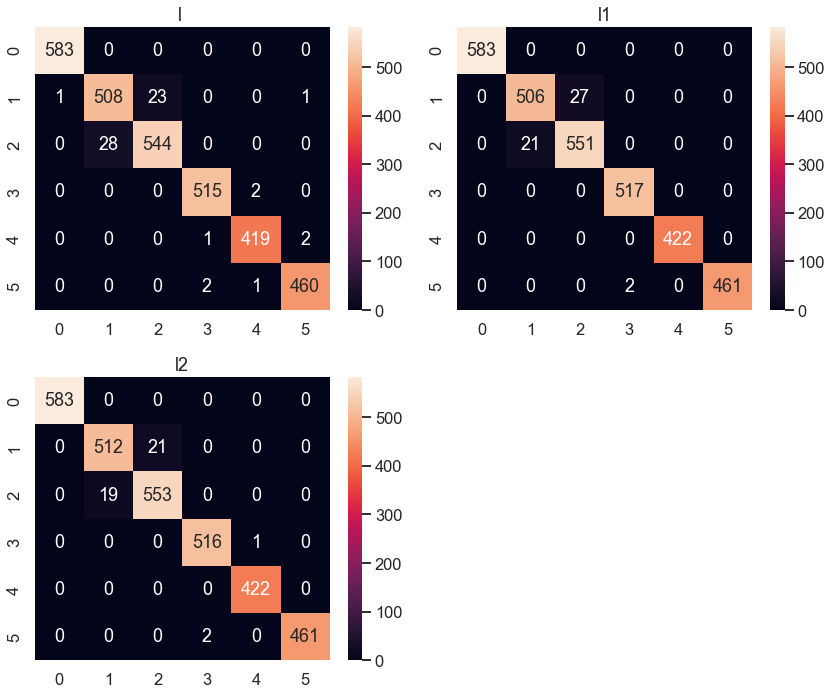

In [33]:
# ploting the confusion matrix for each model
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')
for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()
